
<h1>Задание 1</h1>

У вас есть небольшой искусственный датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data   

<h2>Задание 1.1</h2>

На основании этих данных необходимо составить максимальное(но не менее пяти) количество гипотез о корреляциях между отдельными столбцами и проверить их. 

При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покупают в основном осенью")

In [3]:
import pandas as pd 

In [65]:
df = pd.read_csv('shopping_trends_updated.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [15]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [45]:
for column in df.select_dtypes(include='object').columns:
    unique_values = df[column].unique()
    print(f"'{column}' содержит уникальные значения:")
    print(unique_values)
    print('-' * 60)

'Gender' содержит уникальные значения:
['Male' 'Female']
------------------------------------------------------------
'Item Purchased' содержит уникальные значения:
['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']
------------------------------------------------------------
'Category' содержит уникальные значения:
['Clothing' 'Footwear' 'Outerwear' 'Accessories']
------------------------------------------------------------
'Location' содержит уникальные значения:
['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Alabama' 'Mississippi'
 'North Carolina' 'California' 'Oklahoma' 'Florida' 'Texas' 'Nevada'
 'Kansas' 'Colorado' 'North Dakota' 'Illinois' 'Indiana' 'Arizona'
 'Alaska' 'Tenn

***1. Гипотеза: женщины реже всего покупают одежду размера XL***

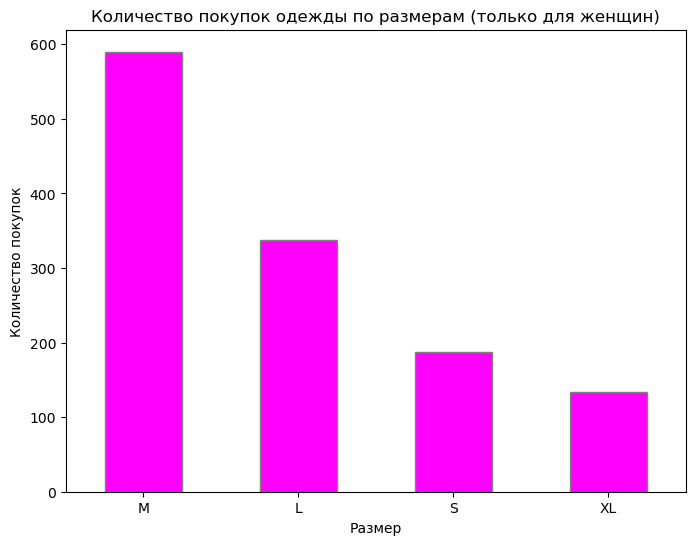

Самый редкий размер среди женщин: XL (134 покупок)
p-значение: 1.0053845758916115e-40
Отвергаем нулевую гипотезу: размер XL действительно покупают реже.


In [51]:

import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# фильтруем данные для женщин
female_data = df[df['Gender'] == 'Female']

# подсчитываем количество покупок для каждого размера
size_counts = female_data['Size'].value_counts()

# график
plt.figure(figsize=(8, 6))
size_counts.plot(kind='bar', color='magenta', edgecolor='grey')
plt.title('Количество покупок одежды по размерам (только для женщин)')
plt.xlabel('Размер')
plt.ylabel('Количество покупок')
plt.xticks(rotation=0)
plt.show()

# проверка, действительно ли XL встречается реже всего
min_size = size_counts.idxmin()
min_count = size_counts.min()

print(f"Самый редкий размер среди женщин: {min_size} ({min_count} покупок)")

# проверка статистической значимости  

observed = size_counts.values
expected = [sum(observed) / len(observed)] * len(observed)  # среднее количество покупок для всех размеров

_, p, _, _ = chi2_contingency([observed, expected])

print(f"p-значение: {p}")

if p < 0.05:
    print("Отвергаем нулевую гипотезу: размер XL действительно покупают реже.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: размер XL покупают с той же частотой, что и другие размеры.")


r: -0.010423647378686536, p: 0.5151978241224925


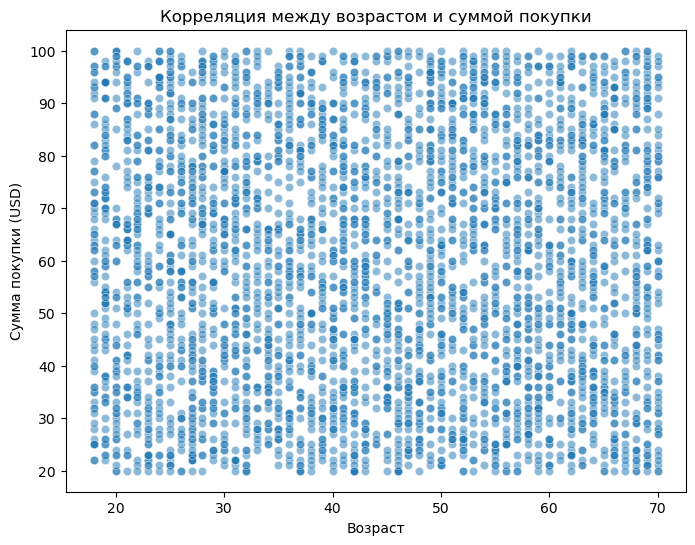

Значимой корреляции между возрастом и суммой покупки нет.


In [54]:
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# корреляция
correlation, p_value = pearsonr(df['Age'], df['Purchase Amount (USD)'])
print(f"r: {correlation}, p: {p_value}")

# график
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Purchase Amount (USD)', data=df, alpha=0.5)
plt.title('Корреляция между возрастом и суммой покупки')
plt.xlabel('Возраст')
plt.ylabel('Сумма покупки (USD)')
plt.show()

if p_value < 0.05:
    print("Есть значимая корреляция между возрастом и суммой покупки.")
else:
    print("Значимой корреляции между возрастом и суммой покупки нет.")


 ***2. Гипотеза: "количество предыдущих покупок коррелирует с частотой покупок"***

Корреляция: 0.000830805265808828, p-значение: 0.9586345500853977


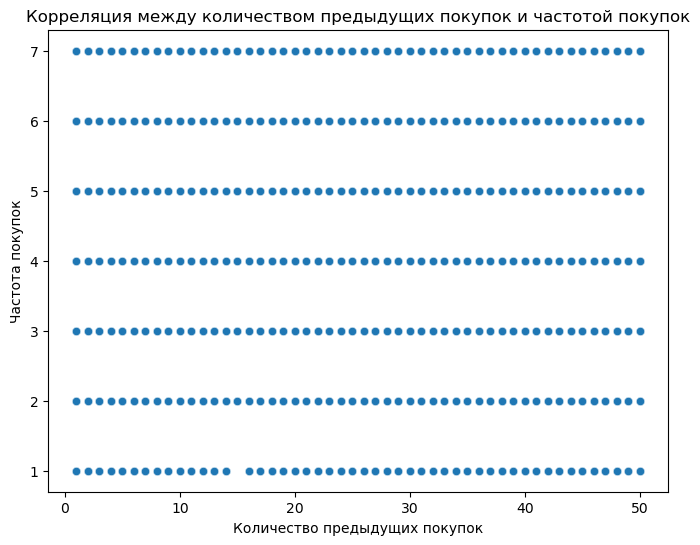

Значимой корреляции между количеством предыдущих покупок и частотой покупок нет.


In [61]:
# преобразование категориальной переменной в числовую

frequency_mapping = {'Fortnightly':1, 'Weekly':2, 'Bi-Weekly':3, 'Monthly': 4, 'Every 3 Months':5, 'Quarterly':6, 'Annually':7}
df['Frequency of Purchases Numeric'] = df['Frequency of Purchases'].map(frequency_mapping)

# корреляция

correlation, p_value = pearsonr(df['Previous Purchases'], df['Frequency of Purchases Numeric'])
print(f"Корреляция: {correlation}, p-значение: {p_value}")

# график

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Previous Purchases', y='Frequency of Purchases Numeric', data=df, alpha=0.6)
plt.title('Корреляция между количеством предыдущих покупок и частотой покупок')
plt.xlabel('Количество предыдущих покупок')
plt.ylabel('Частота покупок')
plt.show()

if p_value < 0.05:
    print("Есть значимая корреляция между количеством предыдущих покупок и частотой покупок.")
else:
    print("Значимой корреляции между количеством предыдущих покупок и частотой покупок нет.")


***3. Гипотеза: "рейтинг отзывов коррелирует с суммой покупки."***


Корреляция: 0.03077592307391445, p-значение: 0.054631573624773264


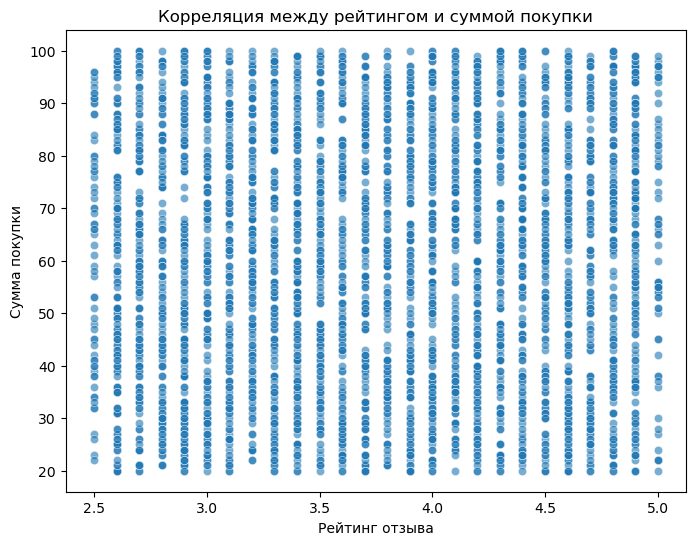

Значимой корреляции между рейтингом и суммой покупки нет.


In [63]:
# корреляция
correlation, p_value = pearsonr(df['Review Rating'], df['Purchase Amount (USD)'])
print(f"Корреляция: {correlation}, p-значение: {p_value}")

# график 

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Review Rating', y='Purchase Amount (USD)', data=df, alpha=0.6)
plt.title('Корреляция между рейтингом и суммой покупки')
plt.xlabel('Рейтинг отзыва')
plt.ylabel('Сумма покупки')
plt.show()

if p_value < 0.05:
    print("Есть значимая корреляция между рейтингом и суммой покупки.")
else:
    print("Значимой корреляции между рейтингом и суммой покупки нет.")


***4. Гипотеза: "мужчины используют промокоды чаще женщин"***

хи-квадрат: 1381.9413463923058, p-значение: 1.7645380691667684e-302


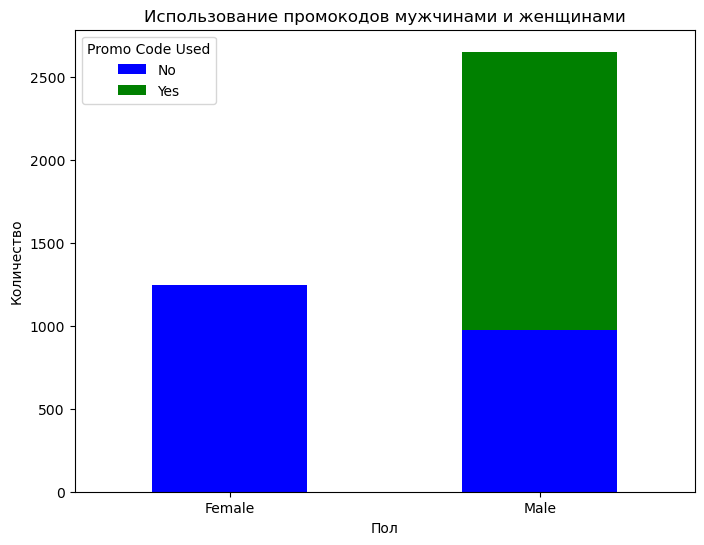

Есть значимая зависимость между полом и использованием промокодов.


In [71]:
from scipy.stats import chi2_contingency

# cоздание таблицы сопряжённости
gender_promo = pd.crosstab(df['Gender'], df['Promo Code Used'])

# Хи-квадрат тест
chi2, p, _ , _ = chi2_contingency(gender_promo)
print(f"хи-квадрат: {chi2}, p-значение: {p}")

# Визуализация
gender_promo.plot(kind='bar', stacked=True, figsize=(8, 6), color=['blue', 'green'])
plt.title('Использование промокодов мужчинами и женщинами')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

if p < 0.05:
    print("Есть значимая зависимость между полом и использованием промокодов.")
else:
    print("Значимой зависимости между полом и использованием промокодов нет.")


***5. Гипотеза: "мужчины покупают розовые товары реже женщин"***

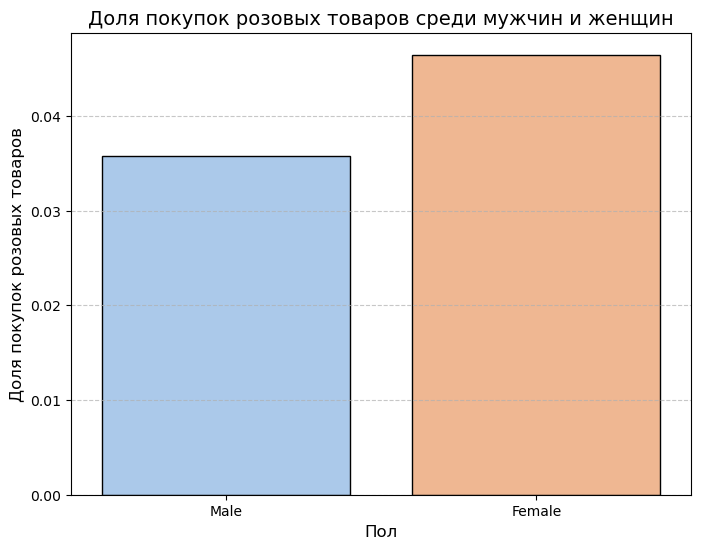

 Доля мужчин, покупающих розовое: 0.03582202111613876
 Доля женщин, покупающих розовое: 0.046474358974358976 
 t-статистика: -1.528555111378012 
 p-значение: 0.12651915413096018
Несмотря на то, что мужчины покупают розовые товары реже, чем женщины (средние доли отличаются), это отличие не является статистически значимым.


In [94]:
from scipy.stats import ttest_ind

# Создание выборок: доля покупок розового цвета среди мужчин и женщин
male_pink_ratio = df[df['Gender'] == 'Male']['Color'].value_counts(normalize=True).get('Pink', 0)
female_pink_ratio = df[df['Gender'] == 'Female']['Color'].value_counts(normalize=True).get('Pink', 0)

# Формируем данные для графика
pink_ratios = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Pink Purchase Ratio': [male_pink_ratio, female_pink_ratio]
})

# Визуализация
plt.figure(figsize=(8, 6))
sns.barplot(data=pink_ratios, x='Gender', y='Pink Purchase Ratio', palette='pastel', edgecolor='black')
plt.title('Доля покупок розовых товаров среди мужчин и женщин', fontsize=14)
plt.xlabel('Пол', fontsize=12)
plt.ylabel('Доля покупок розовых товаров', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# проверка гипотезы с помощью критерия Стьюдента
# создаём выборки: доля покупок для мужчин и женщин
male_pink_data = df[df['Gender'] == 'Male']['Color'] == 'Pink'
female_pink_data = df[df['Gender'] == 'Female']['Color'] == 'Pink'

# критерий Стьюдента
t_stat, p_value = ttest_ind(male_pink_data, female_pink_data, equal_var=False)

print(f" Доля мужчин, покупающих розовое: {male_pink_ratio}\n Доля женщин, покупающих розовое: {female_pink_ratio} \n t-статистика: {t_stat} \n p-значение: {p_value}")
print("Несмотря на то, что мужчины покупают розовые товары реже, чем женщины (средние доли отличаются), это отличие не является статистически значимым.")

<h2>Задание 1.2</h2>

Помимо гипотез:
* найдите самый популярный товар
* постройте распределение покупателей по полу
* определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары
* определите, есть ли зависимость между цветом одежды и сезоном.
* посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.
* найдите самую популярную букву в названии одежды. 

In [106]:
# найти самый популярный товар
most_popular_item = df['Item Purchased'].value_counts().idxmax()

# построить распределение покупателей по полу
gender_distribution = df['Gender'].value_counts()

# какой пол покупает больше всего
highest_spending_gender = df.groupby('Gender')['Purchase Amount (USD)'].sum().idxmax()

# какой пол покупает чаще всего
most_frequent_gender = df['Gender'].value_counts().idxmax()

# какой пол покупает самые дорогие товары
highest_avg_purchase_gender = df.groupby('Gender')['Purchase Amount (USD)'].mean().idxmax()

# какой возраст покупает больше всего
highest_spending_age = df.groupby('Age')['Purchase Amount (USD)'].sum().idxmax()

# какой возраст покупает чаще всего
most_frequent_age = df['Age'].value_counts().idxmax()

# какой возраст покупает самые дорогие товары
highest_avg_purchase_age = df.groupby('Age')['Purchase Amount (USD)'].mean().idxmax()

print("Самый популярный товар:", most_popular_item)
print("Распределение покупателей по полу:", gender_distribution.to_dict())
print("Пол, который тратит больше всего:", highest_spending_gender)
print("Пол, который покупает чаще всего:", most_frequent_gender)
print("Пол, который покупает самые дорогие товары:", highest_avg_purchase_gender)
print("Возраст, который тратит больше всего:", highest_spending_age)
print("Возраст, который покупает чаще всего:", most_frequent_age)
print("Возраст, который покупает самые дорогие товары:", highest_avg_purchase_age)



Самый популярный товар: Blouse
Распределение покупателей по полу: {'Male': 2652, 'Female': 1248}
Пол, который тратит больше всего: Male
Пол, который покупает чаще всего: Male
Пол, который покупает самые дорогие товары: Female
Возраст, который тратит больше всего: 49
Возраст, который покупает чаще всего: 69
Возраст, который покупает самые дорогие товары: 53


In [108]:
# проверить зависимость между цветом одежды и сезоном
color_season_table = pd.crosstab(df['Color'], df['Season'])
chi2, p, _, _ = chi2_contingency(color_season_table)
print(f"Хи-квадрат: {chi2}, p-значение: {p}")

Хи-квадрат: 64.6506366841786, p-значение: 0.718551112120402


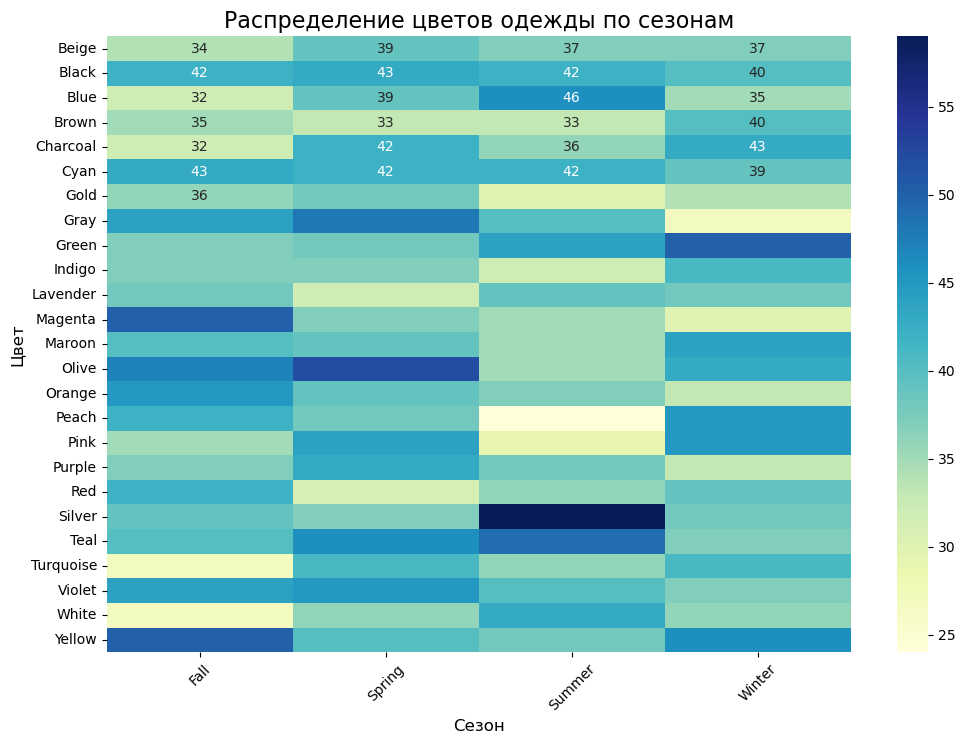

In [109]:
color_season_counts = pd.crosstab(df['Color'], df['Season'])
plt.figure(figsize=(12, 8))
sns.heatmap(color_season_counts, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title('Распределение цветов одежды по сезонам', fontsize=16)
plt.xlabel('Сезон', fontsize=12)
plt.ylabel('Цвет', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [112]:
# уникальные пользователи за сезон)
df.groupby('Season')['Customer ID'].nunique()


Season
Fall      975
Spring    999
Summer    955
Winter    971
Name: Customer ID, dtype: int64

In [113]:
# динамика mau в процентах
seasonal_mau.pct_change()


Season
Fall           NaN
Spring    0.024615
Summer   -0.044044
Winter    0.016754
Name: Customer ID, dtype: float64

In [105]:
# найти самую популярную букву в названии одежды

from collections import Counter

letters = Counter("".join(df['Item Purchased']).lower())
pop_letter = max(letters, key=letters.get)
pop_letter

's'

<h1>Задание 2</h1> 

У нас есть данные о потреблении алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption. 

Загрузите их и изучите, где же люди пьют больше вина, пива и других спиртных напитков.

In [4]:
df = pd.read_csv('drinks.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB


In [6]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [11]:
max_beer_country = df.loc[df['beer_servings'].idxmax(), 'country']
max_spirit_country = df.loc[df['spirit_servings'].idxmax(), 'country']
max_wine_country = df.loc[df['wine_servings'].idxmax(), 'country']

# Вывод результатов
print("Страна с максимальным потреблением пива:", max_beer_country)
print("Страна с максимальным потреблением спиртных напитков:", max_spirit_country)
print("Страна с максимальным потреблением вина:", max_wine_country)

Страна с максимальным потреблением пива: Namibia
Страна с максимальным потреблением спиртных напитков: Grenada
Страна с максимальным потреблением вина: France


In [16]:
import plotly.express as px
import plotly.graph_objects as go

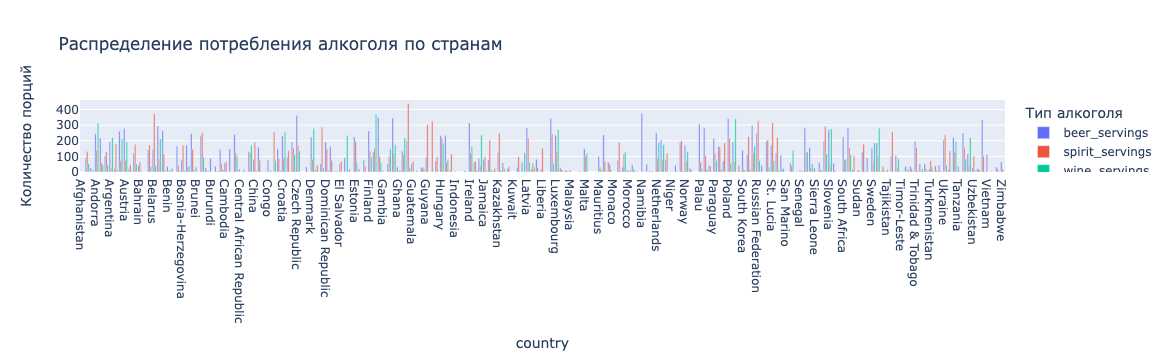

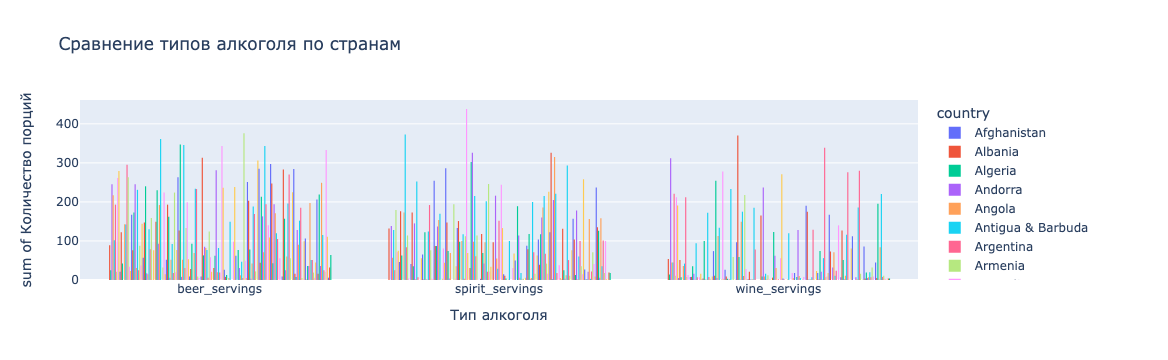

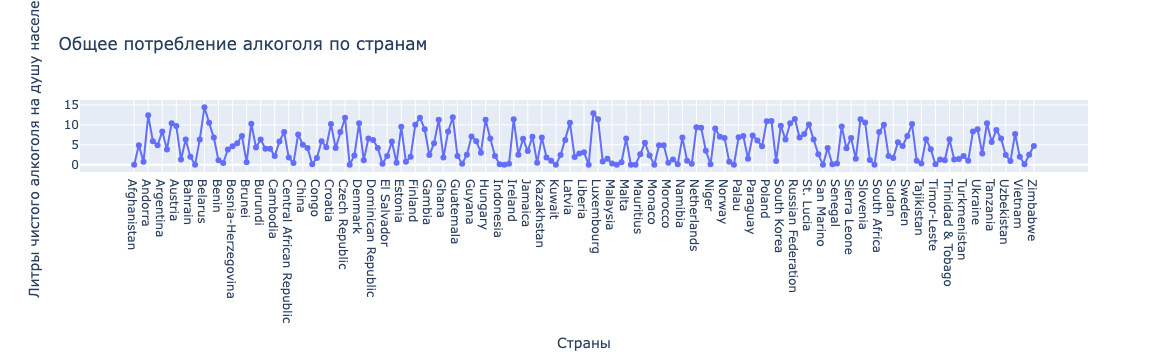

In [21]:
import plotly.express as px
import plotly.graph_objects as go

# распределение потребления пива, спиртных напитков и вина по странам (гистограмма)
fig1 = px.bar(df, x='country', y=['beer_servings', 'spirit_servings', 'wine_servings'],
              title="Распределение потребления алкоголя по странам",
              labels={'value': 'Количество порций', 'variable': 'Тип алкоголя'},
              barmode='group')

# гистограмма для сравнения типов алкоголя
fig2 = px.histogram(df.melt(id_vars='country', value_vars=['beer_servings', 'spirit_servings', 'wine_servings']),
                    x='variable', y='value', color='country',
                    title="Сравнение типов алкоголя по странам",
                    labels={'variable': 'Тип алкоголя', 'value': 'Количество порций'},
                    barmode='group')

# график распределения общего потребления алкоголя
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=df['country'], y=df['total_litres_of_pure_alcohol'],
                          mode='lines+markers', name='Общее потребление'))
fig3.update_layout(title="Общее потребление алкоголя по странам",
                   xaxis_title="Страны", yaxis_title="Литры чистого алкоголя на душу населения")

# Показываем графики
fig1.show()
fig2.show()
fig3.show()


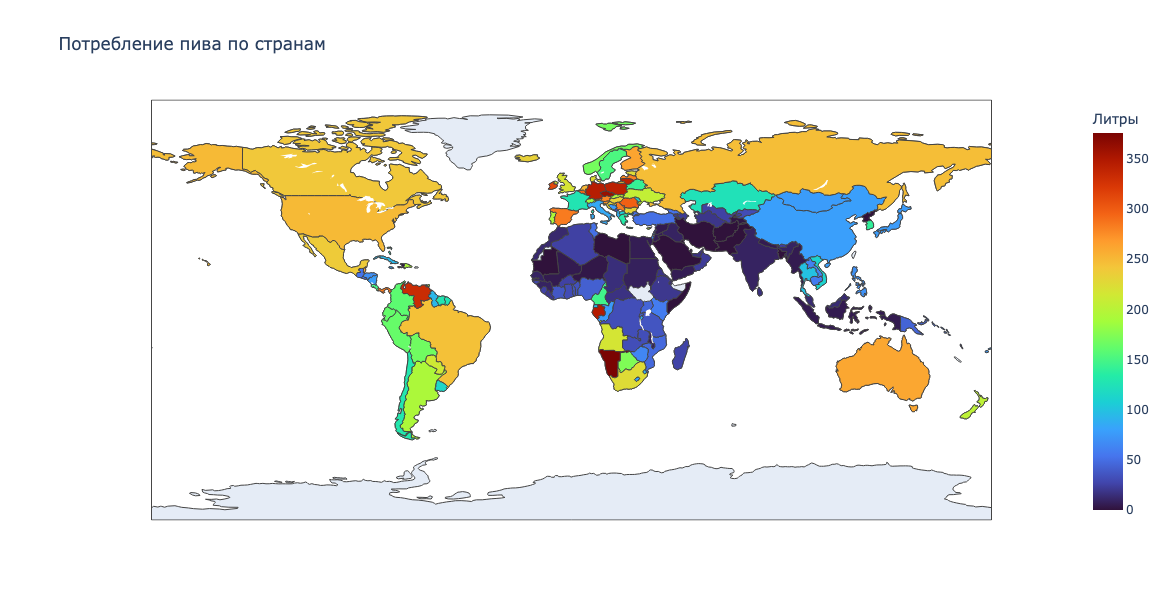

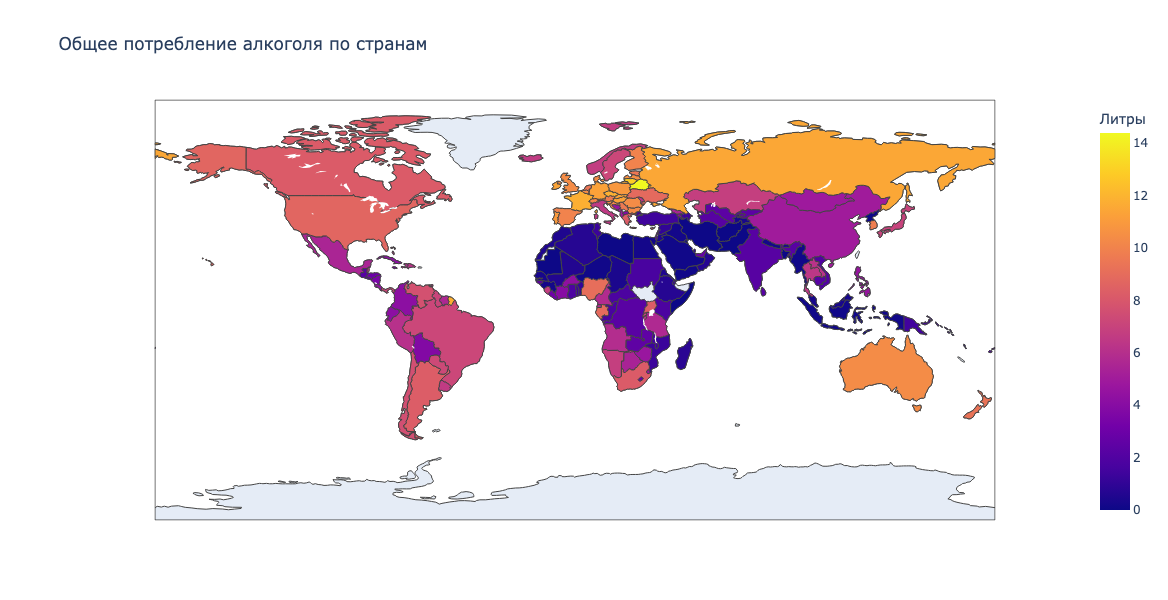

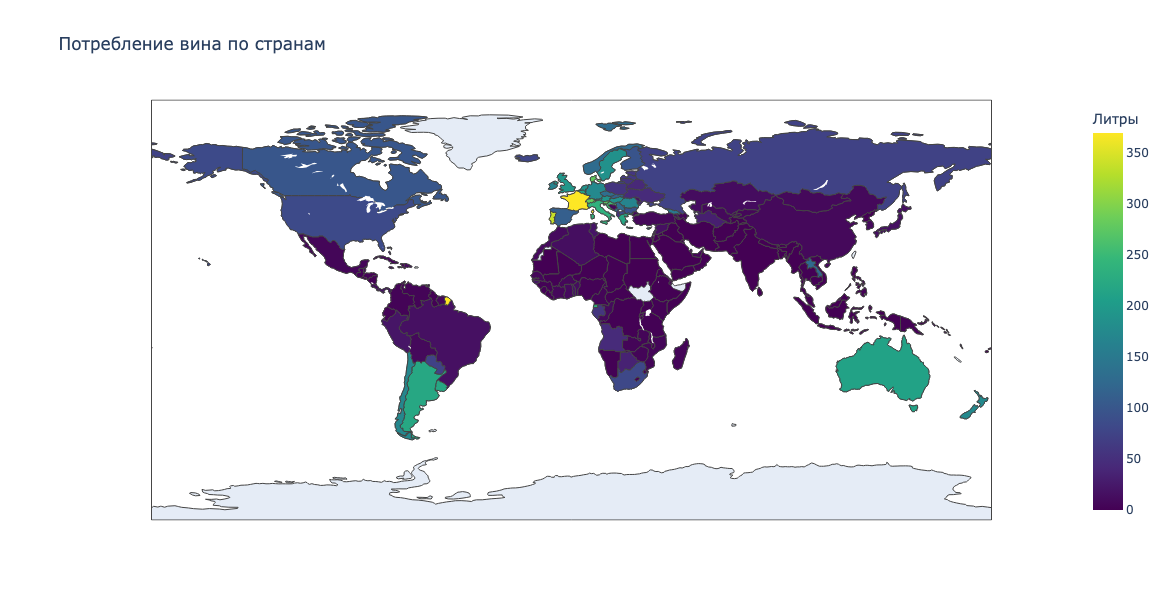

In [29]:
# карта мира с градиентом по потреблению пива 
fig1 = px.choropleth(
    df,
    locations='country',
    locationmode='country names',
    color='beer_servings',
    title='Потребление пива по странам',
    color_continuous_scale=px.colors.sequential.Turbo,
    labels={'beer_servings': 'Литры на душу населения'}
)
fig1.update_geos(showframe=True, showcoastlines=True)
fig1.update_layout(coloraxis_colorbar=dict(title="Литры"))
fig1.update_layout(
    width=1100,  
    height=600   
)
# карта мира с градиентом по общему потреблению алкоголя
fig2 = px.choropleth(
    df,
    locations='country',
    locationmode='country names',
    color='total_litres_of_pure_alcohol',
    title='Общее потребление алкоголя по странам',
    color_continuous_scale=px.colors.sequential.Plasma,
    labels={'total_litres_of_pure_alcohol': 'Литры на душу населения'}
)

fig2.update_geos(showframe=True, showcoastlines=True)
fig2.update_layout(coloraxis_colorbar=dict(title="Литры"))
fig2.update_layout(
    width=1100,  
    height=600  
)

# карта мира с градиентом по потреблению вина 
fig3 = px.choropleth(
    df,
    locations='country',
    locationmode='country names',
    color='wine_servings',
    title='Потребление вина по странам',
    color_continuous_scale=px.colors.sequential.Viridis,
    labels={'wine_servings': 'Литры на душу населения'}
)
fig3.update_geos(showframe=True, showcoastlines=True)
fig3.update_layout(coloraxis_colorbar=dict(title="Литры"))
fig3.update_layout(
    width=1100,  
    height=600   
)
fig1.show()
fig2.show()
fig3.show()


<h1>Задание 3</h1> 

У нас есть полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Определите:

* число проклятий, летальных исходов и их соотношение по фильмам 

* частоту употребления конкретных проклятий 

* распределение времени между проклятиями 

In [30]:
df = pd.read_csv('tarantino.csv')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie       1894 non-null   object 
 1   type        1894 non-null   object 
 2   word        1704 non-null   object 
 3   minutes_in  1894 non-null   float64
dtypes: float64(1), object(3)
memory usage: 59.3+ KB


In [33]:
for column in df.select_dtypes(include='object').columns:
    unique_values = df[column].unique()
    print(f"'{column}' содержит уникальные значения:")
    print(unique_values)
    print('-' * 60)

'movie' содержит уникальные значения:
['Reservoir Dogs' 'Pulp Fiction' 'Kill Bill: Vol. 1' 'Kill Bill: Vol. 2'
 'Inglorious Basterds' 'Django Unchained' 'Jackie Brown']
------------------------------------------------------------
'type' содержит уникальные значения:
['word' 'death']
------------------------------------------------------------
'word' содержит уникальные значения:
['dick' 'dicks' 'fucked' 'fucking' 'bullshit' 'fuck' 'shit' 'motherfucker'
 'pussy' 'fucks' 'hell' 'jap' 'bastard' 'goddamn' 'motherfuckers'
 'asshole' 'ass' 'assholes' 'n-word ' 'asses' 'bitch' 'fuckup' 'fucker'
 'shitty' 'asshead' 'damn' nan 'damned' 'bitches' 'wetback' 'faggot'
 'cocksucker' 'gook' 'fuckers' 'gooks' 'motherfucking' 'dickless'
 'chickenshit' 'slope' 'fuckhead' 'merde' 'shithead' 'cunt' 'cunts'
 'fuckface' 'cockblockery' 'japs' 'jew (verb)' 'bastards' 'horeshit'
 'shitless' 'shitting' 'negro ' 'squaw' 'slut' 'goddamned' 'jackass'
 'horseshit' 'shittiest' 'shitload' 'dumbass']
-----------------

In [50]:

# число проклятий и летальных исходов по фильмам
curse_counts = df[df['type'] == 'word'].groupby('movie').size()
death_counts = df[df['type'] == 'death'].groupby('movie').size()
curse_death_ratio = (curse_counts / (death_counts + 1)).fillna(0)

# частота употребления конкретных проклятий
curse_frequency = df[df['type'] == 'word']['word'].value_counts()

# Распределение времени между проклятиями
curse_times = df[df['type'] == 'word'].sort_values(by='minutes_in')
curse_times['time_diff'] = curse_times['minutes_in'].diff()

# Результаты
results = {
    "Число проклятий по фильмам": curse_counts.to_dict(),
    "Число летальных исходов по фильмам": death_counts.to_dict(),
    "Соотношение проклятий и летальных исходов по фильмам": curse_death_ratio.to_dict(),

}

results


{'Число проклятий по фильмам': {'Django Unchained': 262,
  'Inglorious Basterds': 58,
  'Jackie Brown': 368,
  'Kill Bill: Vol. 1': 57,
  'Kill Bill: Vol. 2': 69,
  'Pulp Fiction': 469,
  'Reservoir Dogs': 421},
 'Число летальных исходов по фильмам': {'Django Unchained': 47,
  'Inglorious Basterds': 48,
  'Jackie Brown': 4,
  'Kill Bill: Vol. 1': 63,
  'Kill Bill: Vol. 2': 11,
  'Pulp Fiction': 7,
  'Reservoir Dogs': 10},
 'Соотношение проклятий и летальных исходов по фильмам': {'Django Unchained': 5.458333333333333,
  'Inglorious Basterds': 1.183673469387755,
  'Jackie Brown': 73.6,
  'Kill Bill: Vol. 1': 0.890625,
  'Kill Bill: Vol. 2': 5.75,
  'Pulp Fiction': 58.625,
  'Reservoir Dogs': 38.27272727272727}}

In [37]:
df[df['movie'] == 'Reservoir Dogs']

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61
...,...,...,...,...
426,Reservoir Dogs,word,fucking,95.21
427,Reservoir Dogs,word,fucking,95.33
428,Reservoir Dogs,word,fucking,95.33
429,Reservoir Dogs,death,NaN,95.40


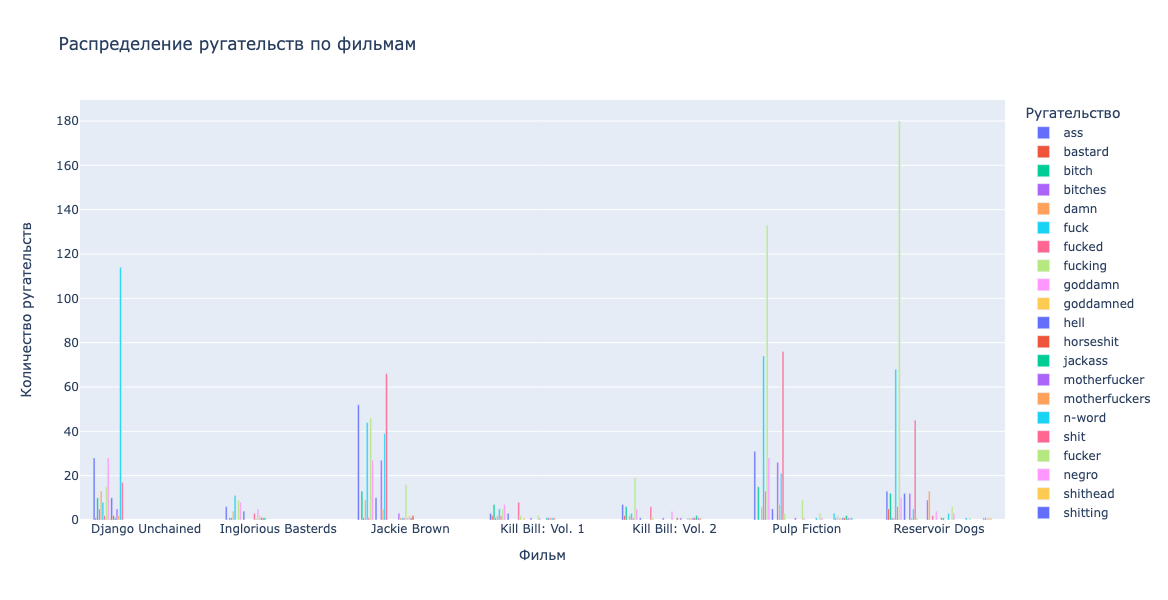

In [55]:
import plotly.express as px

# Подготовка данных для графика
curse_counts = df[df['type'] == 'word'].groupby(['movie', 'word']).size().reset_index(name='count')

# Построение графика
fig = px.bar(
    curse_counts,
    x='movie',
    y='count',
    color='word',
    title='Распределение ругательств по фильмам',
    labels={'count': 'Количество', 'movie': 'Фильм', 'word': 'Ругательство'},
    barmode='group'
)

# Настройки и отображение графика
fig.update_layout(xaxis_title='Фильм', yaxis_title='Количество ругательств', width = 1000, height = 600)
fig.show()


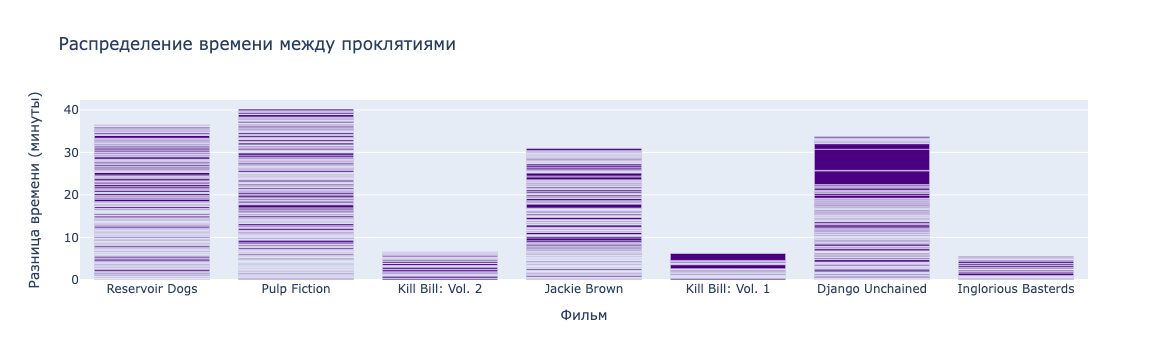

In [56]:
import plotly.graph_objects as go

# Подготовка данных для распределения времени между проклятиями
curse_times = df[df['type'] == 'word'].sort_values(by='minutes_in')
curse_times['time_diff'] = curse_times['minutes_in'].diff()

# Удаляем строки с отсутствующим значением разницы времени
curse_times = curse_times.dropna()

# Построение графика
fig = go.Figure()

fig.add_trace(go.Bar(
    x=curse_times['movie'],
    y=curse_times['time_diff'],
    name="Разница времени",
    marker_color='indigo'
))

# Настройки графика
fig.update_layout(
    title="Распределение времени между проклятиями",
    xaxis_title="Фильм",
    yaxis_title="Разница времени (минуты)",
    template="plotly"
)

fig.show()


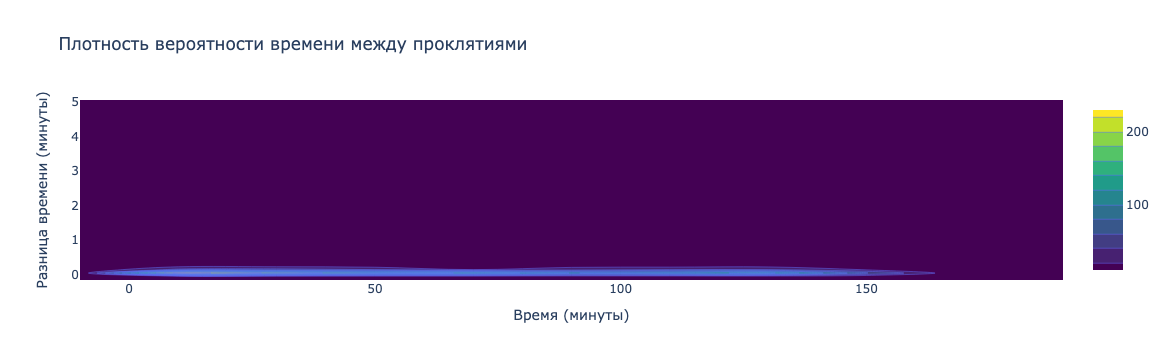

In [57]:
import plotly.express as px

# Подготовка данных для распределения времени между проклятиями
curse_times = df[df['type'] == 'word'].sort_values(by='minutes_in')
curse_times['time_diff'] = curse_times['minutes_in'].diff()

# Удаляем строки с отсутствующим значением разницы времени
curse_times = curse_times.dropna()

# Построение графика плотности вероятности
fig = px.density_contour(
    curse_times,
    x='minutes_in',
    y='time_diff',
    title="Плотность вероятности времени между проклятиями",
    labels={'minutes_in': 'Время (минуты)', 'time_diff': 'Разница времени (минуты)'}
)

# Настройки отображения
fig.update_traces(contours_coloring="fill", colorscale="Viridis")
fig.update_layout(
    xaxis_title="Время (минуты)",
    yaxis_title="Разница времени (минуты)",
    template="plotly"
)

fig.show()
